In [2]:
%cd ..

/Users/shimodamasayuki/Desktop/shimoda-tsldm-vol18


/Users/shimodamasayuki/Desktop/shimoda-tsldm-vol18/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [11]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Algo: le ===============
Avg: [0.000393895895103924, 0.0069901167997159066, 0.02946007090213243, 2.0888351667061213, 15.543271333395387]
Std: [0.00017129911206804164, 0.0027832649786496133, 0.007667739980549405, 0.09682367816305594, 0.7086392184923036]
Slope: 2.32097383732255
0
Algo: cap ===============
Avg: [0.0015555375954136252, 0.06282366239756812, 0.4047388666018378, 43.52212449159706, 359.61969375809423]
Std: [0.0005979980179995765, 0.011166675881640602, 0.030107662926035058, 1.102753523697461, 12.16819655310965]
Slope: 2.7037213469944965
0
Algo: ccap ===============
Avg: [0.001939662400400266, 0.05371213340258692, 0.3395986710034776, 37.43701361230633, 301.6177168206923]
Std: [0.0010302521212366812, 0.010494557977844167, 0.02595598509282157, 0.8848709981007321, 8.08351354100721]
Slope: 2.632150449511997
0


/var/folders/1v/dhlbwt0n2d53l5v372rycjsh0000gn/T/ipykernel_17964/541665883.py:61: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0)


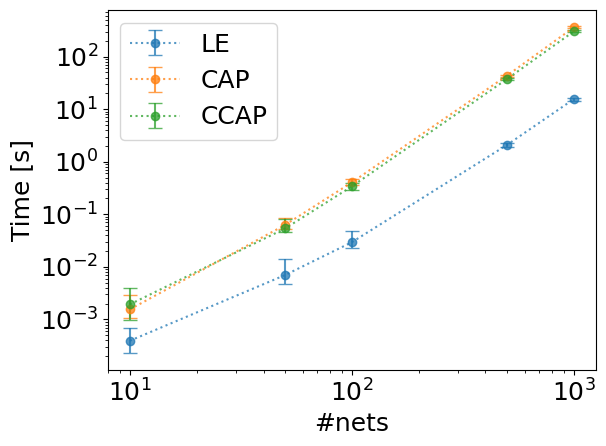

In [208]:
plt.rcParams["font.size"] = 18

# read files...


algorithms = ["le", "cap", "ccap"]
n_nets = np.array([10, 50, 100, 500, 1000])

fig, ax = plt.subplots()
for i, algo in enumerate(algorithms):
    averages = []
    stds = []
    max_vals = []
    min_vals = []
    for n_net in n_nets:
        fpath = os.path.join("outputs/time/", f"{algo}-c1-{n_net}.csv")
        with open(fpath, "r") as file:
            reader = csv.reader(file)
            vals = [[float(v) for v in row] for row in reader][0]
        avg = np.mean(vals)
        averages.append(avg)
        std = np.std(vals)
        stds.append(std)
        # errorbarは点との距離のため, avgとの距離を入力する
        max_vals.append(np.abs(np.max(vals) - avg))
        min_vals.append(np.abs(np.min(vals) - avg))
    
    

    log_x = np.log(n_nets)
    log_y = np.log(averages)
    slope, intercept = np.polyfit(log_x, log_y, 1)

    min_max = np.array([[min, max] for min, max in zip(min_vals, max_vals)])
    min_max = min_max.transpose(1, 0)
        
    # confirm val
    print(f"Algo: {algo} " + "=" * 15)
    print(f"Avg: {averages}")
    print(f"Std: {stds}")
    print(f"Slope: {slope}")
        
    if algo == "le":
        algo = "LE"
    else:
        algo = algo.upper()
        
    label = algo
    
    diff = 0
    offset = diff * i - diff
    print(offset)
    trans = Affine2D().translate(offset, 0.0) + ax.transData
    ax.errorbar(n_nets, averages, yerr=min_max, label=label,
                marker="o", alpha=.75, fmt=':', capsize=5, capthick=1, transform=trans)
    # plt.errorbar(n_nets, averages, yerr=stds, label=algo)
    plt.xlabel("#nets")
    plt.ylabel("Time [s]")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0)
    plt.tight_layout()
    plt.legend()

-0.15
0.0
0.15


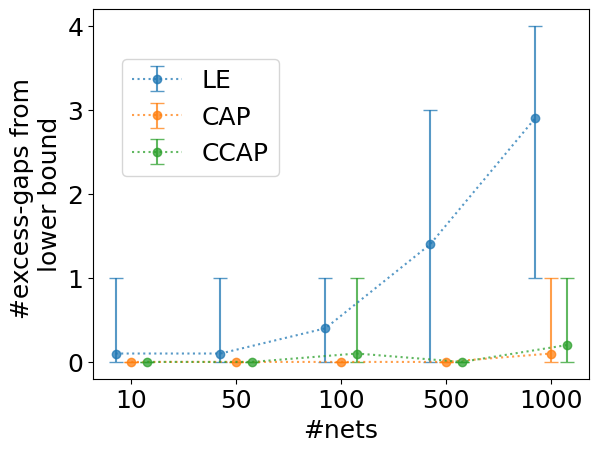

In [202]:

from matplotlib.transforms import Affine2D
# 超過gap数の平均分散
plt.rcParams["font.size"] = 18

algorithms = ["le", "cap", "ccap"]
n_nets = np.array([10, 50, 100, 500, 1000])


# trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
# trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
# trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData

# algorithms = ["le"]
# n_nets = np.array([10])
fig, ax = plt.subplots()
for i, algo in enumerate(algorithms):
    averages = []
    stds = []
    max_vals = []
    min_vals = []
    for n_net in n_nets:
        # algo's data
        fpath = os.path.join("outputs/gap/", f"{algo}-c1-{n_net}.csv")
        with open(fpath, "r") as file:
            reader = csv.reader(file)
            vals = [[float(v) for v in row] for row in reader][0]
            
        # lower bound
        fpath = os.path.join("outputs/gap/", f"lb-c1-{n_net}.csv")
        with open(fpath, "r") as file:
            reader = csv.reader(file)
            lb_vals = [[float(v) for v in row] for row in reader][0]
            
        
        vals = np.array(vals)
        lb_vals = np.array(lb_vals)
        # 超過数計算
        excess_vals = vals - lb_vals
        
        avg = np.mean(excess_vals)
        std = np.std(excess_vals)
        # print(std)
        averages.append(avg)
        stds.append(std)
        # errorbarは点との距離のため, avgとの距離を入力する
        max_vals.append(np.abs(np.max(excess_vals) - avg))
        min_vals.append(np.abs(np.min(excess_vals) - avg))
    
    # print(max_vals)
    # print(min_vals)
    min_max = np.array([[min, max] for min, max in zip(min_vals, max_vals)])
    min_max = min_max.transpose(1, 0)
    # print(min_max.shape)
    # print(min_max)
 

    # plt.errorbar(n_nets, averages, yerr=stds, label=label, marker="o")
    diff = 0.15
    offset = diff * i - diff
    print(offset)
    trans = Affine2D().translate(offset, 0.0) + ax.transData
    
    #
    n_nets = [str(n) for n in n_nets]

    if algo == "le":
        algo = "LE"
    else:
        algo = algo.upper()
    label = algo
    
    ax.errorbar(n_nets, averages, yerr=min_max, label=label,
                marker="o", alpha=.75, fmt=':', capsize=5, capthick=1, transform=trans)
    
    # data = {
    #     'x': n_nets,
    #     'y1': [y - e for y, e in zip(averages, min_vals)],
    #     'y2': [y + e for y, e in zip(averages, max_vals)]}
    # ax.fill_between(**data, alpha=.25)
    
    
    # plt.errorbar(n_nets, averages, yerr=stds, label=algo)
    plt.legend(bbox_to_anchor=(0.4, 0.9))
    plt.xlabel("#nets")
    plt.ylabel("#excess-gaps from \nlower bound")
    # ax.set_xlim(0, )
    # ax.tight_layout()
    # fig.legend()

-0.15
0.0
0.15


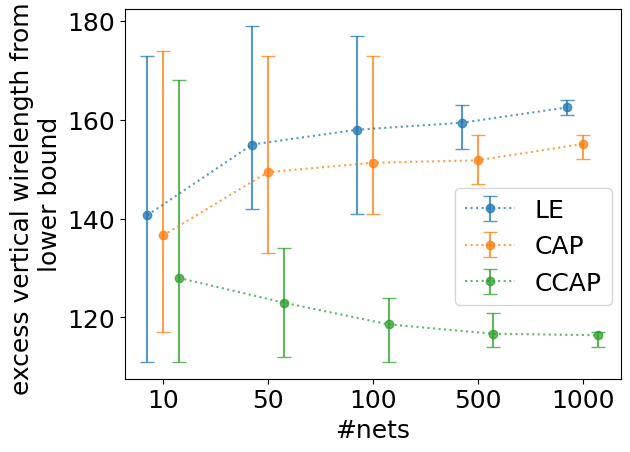

In [188]:

# 超過vwlの平均分散
plt.rcParams["font.size"] = 18

algorithms = ["le", "cap", "ccap"]
n_nets = np.array([10, 50, 100, 500, 1000])
# algorithms = ["le"]
# n_nets = np.array([10])
fig, ax = plt.subplots()
for i, algo in enumerate(algorithms):
    averages = []
    stds = []
    max_vals = []
    min_vals = []
    for n_net in n_nets:
        # algo's data
        fpath = os.path.join("outputs/vwl/", f"{algo}-c1-{n_net}.csv")
        with open(fpath, "r") as file:
            reader = csv.reader(file)
            vals = [[float(v) for v in row] for row in reader][0]
            
        # lower bound
        fpath = os.path.join("outputs/vwl/", f"lb-c1-{n_net}.csv")
        with open(fpath, "r") as file:
            reader = csv.reader(file)
            lb_vals = [[float(v) for v in row] for row in reader][0]
            
        
        vals = np.array(vals)
        lb_vals = np.array(lb_vals)
        # 超過数計算
        excess_vals = np.ceil((vals / lb_vals) * 100)
        # print(excess_vals)
        
        avg = np.mean(excess_vals)
        std = np.std(excess_vals)
        # print(std)
        averages.append(avg)
        stds.append(std)
        # errorbarは点との距離のため, avgとの距離を入力する
        max_vals.append(np.abs(np.max(excess_vals) - avg))
        min_vals.append(np.abs(np.min(excess_vals) - avg))
    
    min_max = np.array([[min, max] for min, max in zip(min_vals, max_vals)])
    min_max = min_max.transpose(1, 0)
     
    diff = 0.15
    offset = diff * i - diff
    print(offset)
    trans = Affine2D().translate(offset, 0.0) + ax.transData
    
     
    if algo == "le":
        algo = "LE"
    else:
        algo = algo.upper()
    label = algo
    n_nets = [str(n) for n in n_nets]
    
    ax.errorbar(n_nets, averages, yerr=min_max, label=label,
                marker="o", alpha=.75, fmt=':', capsize=5, capthick=1, transform=trans)
    
    # data = {
    #     'x': n_nets,
    #     'y1': [y - e for y, e in zip(averages, min_vals)],
    #     'y2': [y + e for y, e in zip(averages, max_vals)]}
    # plt.fill_between(**data, alpha=.25)
    
    plt.legend(bbox_to_anchor=(0.64, 0.55))
    plt.xlabel("#nets")
    plt.ylabel("excess vertical wirelength from \nlower bound")
    # plt.xlim(0)
    # plt.tight_layout()